In [546]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [547]:
dataFrame = pd.read_csv('taxi_trip_pricing.csv')

In [548]:
for column in dataFrame.columns:
  print(column)

Trip_Distance_km
Time_of_Day
Day_of_Week
Passenger_Count
Traffic_Conditions
Weather
Base_Fare
Per_Km_Rate
Per_Minute_Rate
Trip_Duration_Minutes
Trip_Price


In [549]:
dataFrame.drop(['Base_Fare','Per_Km_Rate','Per_Minute_Rate'] , axis = 1 , inplace = True)

In [550]:
for column in dataFrame.columns:
  print(column)

Trip_Distance_km
Time_of_Day
Day_of_Week
Passenger_Count
Traffic_Conditions
Weather
Trip_Duration_Minutes
Trip_Price


In [551]:
dataFrame.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,NaN,75.5657


In [552]:
Traffic_Conditions_mapper = {"Low": 0 , "Medium" : 1 , "High" : 2}
dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].replace(Traffic_Conditions_mapper)


Time_of_Day_mapper = {"Morning": 0 , "Afternoon" : 1 , "Evening" : 2 , "Night" : 3} 
dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].replace(Time_of_Day_mapper)

Day_of_Week_mapper = {"Weekday": 0 , "Weekend" : 1} 
dataFrame['Day_of_Week'] = dataFrame['Day_of_Week'].replace(Day_of_Week_mapper) 

Weather_mapper = {"Clear": 0 , "Rain" : 1 , "Snow" : 2} 
dataFrame['Weather'] = dataFrame['Weather'].replace(Weather_mapper) 
dataFrame.head(10)





C:\Users\mahdi\AppData\Local\Temp\ipykernel_11256\989743489.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].replace(Traffic_Conditions_mapper)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_11256\989743489.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].replace(Time_of_Day_mapper)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_11256\989743489.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated an

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,0.0,0.0,3.0,0.0,0.0,53.82,36.2624
1,47.59,1.0,0.0,1.0,2.0,0.0,40.57,NaN
2,36.87,2.0,1.0,1.0,2.0,0.0,37.27,52.9032
3,30.33,2.0,0.0,4.0,0.0,NaN,116.81,36.4698
4,NaN,2.0,0.0,3.0,2.0,0.0,22.64,15.6180
5,8.64,1.0,1.0,2.0,1.0,0.0,89.33,60.2028
6,3.85,1.0,0.0,4.0,2.0,1.0,5.05,11.2645
7,43.44,2.0,1.0,3.0,NaN,0.0,NaN,101.1216
8,30.45,0.0,0.0,3.0,2.0,0.0,110.33,NaN
9,35.70,1.0,0.0,2.0,0.0,1.0,NaN,75.5657


In [553]:
dataFrame.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [554]:
dataFrame['Trip_Distance_km'] = dataFrame['Trip_Distance_km'].fillna(dataFrame['Trip_Distance_km'].mean())
dataFrame['Trip_Duration_Minutes'] = dataFrame['Trip_Duration_Minutes'].fillna(dataFrame['Trip_Duration_Minutes'].mean())
dataFrame['Trip_Price'] = dataFrame['Trip_Price'].fillna(dataFrame['Trip_Price'].mean())
dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].apply(
    lambda x: np.random.choice([0, 1, 2]) if np.isnan(x) else x
)
dataFrame['Passenger_Count'] = dataFrame['Passenger_Count'].apply(
    lambda x: np.random.choice([1, 2, 3, 4]) if np.isnan(x) else x
)

dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].apply(
    lambda x: np.random.choice([0, 1, 2, 3]) if np.isnan(x) else x
)
dataFrame['Day_of_Week'] = dataFrame['Day_of_Week'].apply(
    lambda x: np.random.choice([0, 1]) if np.isnan(x) else x
)
dataFrame['Weather'] = dataFrame['Weather'].apply(
    lambda x: np.random.choice([0, 1, 2]) if np.isnan(x) else x
)



In [555]:
dataFrame.isnull().sum() 

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [556]:
dataFrame.head(20)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.350000,0.0,0.0,3.0,0.0,0.0,53.820000,36.262400
1,47.590000,1.0,0.0,1.0,2.0,0.0,40.570000,56.874773
2,36.870000,2.0,1.0,1.0,2.0,0.0,37.270000,52.903200
3,30.330000,2.0,0.0,4.0,0.0,1.0,116.810000,36.469800
4,27.070547,2.0,0.0,3.0,2.0,0.0,22.640000,15.618000
5,8.640000,1.0,1.0,2.0,1.0,0.0,89.330000,60.202800
6,3.850000,1.0,0.0,4.0,2.0,1.0,5.050000,11.264500
7,43.440000,2.0,1.0,3.0,2.0,0.0,62.118116,101.121600
8,30.450000,0.0,0.0,3.0,2.0,0.0,110.330000,56.874773
9,35.700000,1.0,0.0,2.0,0.0,1.0,62.118116,75.565700


In [557]:
numerical_columns = dataFrame.select_dtypes(include=["int64", "float64"]).columns
for column in numerical_columns:
    correlation = dataFrame[column].corr(dataFrame['Trip_Price'])
    print(f"Correlation between {column:<25} and Trip_Price: {correlation:<20}")

Correlation between Trip_Distance_km          and Trip_Price: 0.8296848519933567  
Correlation between Time_of_Day               and Trip_Price: -0.00964153545569648
Correlation between Day_of_Week               and Trip_Price: -0.035757404132556465
Correlation between Passenger_Count           and Trip_Price: -0.015734760643234463
Correlation between Traffic_Conditions        and Trip_Price: 0.07107859323504438 
Correlation between Weather                   and Trip_Price: 0.01751662179922024 
Correlation between Trip_Duration_Minutes     and Trip_Price: 0.21514407367822885 
Correlation between Trip_Price                and Trip_Price: 1.0                 


In [558]:
dataFrame['Traffic_Conditions'].value_counts()


Traffic_Conditions
0.0    413
1.0    396
2.0    191
Name: count, dtype: int64

In [559]:
dataFrame['Passenger_Count'].value_counts()

Passenger_Count
3.0    268
1.0    253
2.0    253
4.0    226
Name: count, dtype: int64

In [560]:
dataFrame['Time_of_Day'].value_counts()

Time_of_Day
1.0    381
0.0    293
2.0    216
3.0    110
Name: count, dtype: int64

In [561]:
dataFrame['Weather'].value_counts()

Weather
0.0    682
1.0    246
2.0     72
Name: count, dtype: int64

In [562]:
dataFrame['Day_of_Week'].value_counts()

Day_of_Week
0.0    676
1.0    324
Name: count, dtype: int64

In [563]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   float64
 2   Day_of_Week            1000 non-null   float64
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   float64
 5   Weather                1000 non-null   float64
 6   Trip_Duration_Minutes  1000 non-null   float64
 7   Trip_Price             1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


In [564]:
features = dataFrame.iloc[:,:-1]
dependentVariable = dataFrame.iloc[:,-1]

In [565]:
standardScalar = StandardScaler()
features = standardScalar.fit_transform(features)

In [566]:
featuresTrain, featuresTest, dependentVariableTrain, dependentVariableTest = train_test_split(features, dependentVariable , test_size=0.2, random_state=200)

In [567]:
featuresTrain

array([[ 7.25563435e-01,  8.89360713e-01,  1.44444444e+00, ...,
         2.98069561e-01,  9.87086031e-01, -4.89664262e-01],
       [ 5.13004537e+00, -1.48399746e-01,  1.44444444e+00, ...,
        -1.04458612e+00, -6.31087790e-01, -1.04770747e+00],
       [ 1.10511954e+00, -1.18616020e+00, -6.92307692e-01, ...,
        -1.04458612e+00, -6.31087790e-01,  2.26838413e-16],
       ...,
       [-8.85487221e-01, -1.48399746e-01,  1.44444444e+00, ...,
         2.98069561e-01, -6.31087790e-01,  1.28375107e+00],
       [-6.44654745e-01, -1.48399746e-01, -6.92307692e-01, ...,
         2.98069561e-01, -6.31087790e-01,  1.79646125e+00],
       [-1.29856391e+00, -1.18616020e+00, -6.92307692e-01, ...,
        -1.04458612e+00,  2.60525985e+00,  1.65950442e+00]])

In [568]:
featuresTest

array([[-0.30738614,  0.88936071,  1.44444444, ...,  1.64072524,
        -0.63108779, -0.81784985],
       [-0.10007424, -1.1861602 ,  1.44444444, ...,  0.29806956,
         0.98708603, -0.15605148],
       [-0.39196114,  1.92712117, -0.69230769, ..., -1.04458612,
        -0.63108779,  0.70974553],
       ...,
       [-0.26045733, -1.1861602 , -0.69230769, ...,  1.64072524,
        -0.63108779,  0.30079053],
       [ 0.27896617,  0.88936071, -0.69230769, ..., -1.04458612,
        -0.63108779, -1.36695415],
       [-0.47086343, -1.1861602 , -0.69230769, ...,  1.64072524,
        -0.63108779,  0.75444007]])

In [569]:
dependentVariableTrain

989     82.442000
835    224.914663
678     50.731200
177     56.874773
410    206.508652
          ...    
810    109.430400
836     65.947900
784     45.431200
617     37.390000
794     52.779600
Name: Trip_Price, Length: 800, dtype: float64

In [570]:
dependentVariableTest

674    30.401500
233    53.279200
739    40.566500
865    59.742100
523    84.155800
         ...    
931    63.777700
871    56.874773
397    56.874773
355    41.656200
593    58.086100
Name: Trip_Price, Length: 200, dtype: float64

In [571]:
model = LinearRegression()
model.fit(featuresTrain, dependentVariableTrain)
predections = model.predict(featuresTest)

In [572]:
rSquaredScore = r2_score(dependentVariableTest, predections)
print("The accuracy is {}%".format(round(rSquaredScore, 2) * 100))



The accuracy is 79.0%


In [573]:
results = pd.DataFrame({
    "Actual": dependentVariableTest,
    "Predicted": predections
})
print(results.head(20))

         Actual   Predicted
674   30.401500   39.494261
233   53.279200   54.775275
739   40.566500   49.371410
865   59.742100   59.724217
523   84.155800   75.210062
726   28.723500   23.604415
473   61.094000   73.167334
501   47.996000   58.368130
570   61.228700   67.446789
346   86.897700   79.558820
221   63.953400   66.696692
207   56.874773   68.843903
256   92.683200   80.436440
588  247.598318  202.226928
74    36.438800   83.014086
404   26.117600   59.838118
632   56.874773   54.479589
294   33.749100   21.060989
659   65.195000   55.774933
136   75.220400   64.044535


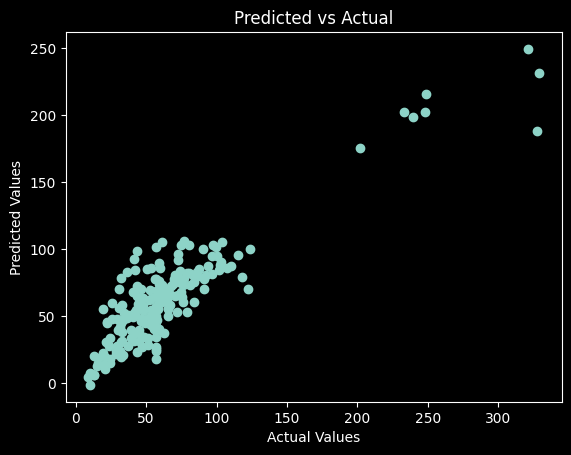

In [574]:
import matplotlib.pyplot as plt

plt.scatter(dependentVariableTest, predections, alpha=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()